# **🌟Import the Depedencies**
*   pandas - making dataframes
*   matplotlib& seaborn - used to make graphs & plots
*   sklearn - to perform regression / classification
*   metrics - to identify outliers / errors etc.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# **🌟Data Collection**

## **⭐Reading Data**

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **⭐Exploration of Data**

In [3]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 918 rows , 12 columns.


## **⭐Checking Null values**

In [4]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## **⭐Checking Duplicated Rows**

In [5]:
print("Num of Duplicated Rows is: ",df.duplicated().sum())

Num of Duplicated Rows is:  0


## **⭐Checking Data Types**

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# **🌟 Data Analysis**

## **⭐Checking Distribution of Age**

In [9]:
print("Min of ages is ",df['Age'].min())
print("Max of ages is ",df['Age'].max())
print("Most freq age is ",df['Age'].mode()[0])
print("Range of ages from ",df['Age'].min(),"to ",df['Age'].max())



data = df['Age']

fig = go.Figure(data=[go.Histogram(x=data, marker_color='lightgreen',

                                    marker=dict(color='red'),
                                    text=data.value_counts().sort_index().values)])

fig.update_layout(
    title='Distribution of Age',
    title_font_size=16,
    xaxis_title='Age',
    yaxis_title='Frequency',


    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot

    title_x=0.5,  # Set the title's x position to the center of the plot
    plot_bgcolor='black'  # Set background color to black
)
print('\n')
fig.show()

Min of ages is  28
Max of ages is  77
Most freq age is  54
Range of ages from  28 to  77




## **⭐Checking Distribution of Sex**

In [11]:
male_count = len(df[df['Sex'] == 'M'])
print("Count of males   :", male_count)

female_count = len(df[df['Sex'] == 'F'])
print("Count of Females:", female_count)


fig = px.bar(df, x='Sex', color='Sex', labels={'Sex': 'Gender'},
             color_discrete_map={"M": '#7799cc', "F": "pink"})

fig.update_traces(textposition='inside',
                  hoverinfo='none', marker_line_width=0)




for i, count in enumerate([len(df[df['Sex'] == 'M']), female_count]):
    fig.add_annotation(x=i, y=count, text=str(count),
                       showarrow=False, font=dict(color='white', size=16))

fig.update_layout(title='Gender Distribution', title_font_size=16,
                  xaxis_title='Gender', yaxis_title='Count',
                  bargap=0.1, width=800, height=600,
                     title_x=0.5,  plot_bgcolor='black'
   )

print('\n')
fig.show()

Count of males   : 725
Count of Females: 193




## **⭐Checking Distribution of Sex**

In [13]:
print(df['ChestPainType'].value_counts())

fig = px.bar(df, x='ChestPainType', color='ChestPainType', labels={'ChestPainType': 'Chest Pain Type'},
             color_discrete_map={'0': '#1f77b4', '1': '#ff7f0e', '2': '#2ca02c', '3': '#d62728'})


fig.update_traces(textposition='inside',
                  hoverinfo='none', marker_line_width=0)


for i, count in enumerate(df['ChestPainType'].value_counts().sort_index()):
    fig.add_annotation(x=i, y=count, text=str(count),
                       showarrow=False, font=dict(color='white', size=16))

fig.update_layout(title='Distribution of ChestPainType', title_font_size=16,
                  xaxis_title='Chest Pain Type', yaxis_title='Count',
                  bargap=0.1, width=800, height=600,    title_x=0.5, plot_bgcolor='black')

print('\n')
fig.show()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64




## **⭐Checking Distribution of RestingECG**

In [15]:
resting_ecg_counts = df['RestingECG'].value_counts()
print(resting_ecg_counts)


colors =colors = ['skyblue', 'mediumturquoise', 'lightgreen']


fig = px.pie(names=resting_ecg_counts.index,
             values=resting_ecg_counts.values,
             color_discrete_sequence=colors)

explode = [0.05 if index == 'Normal' else 0 for index in resting_ecg_counts.index]


fig.update_layout(title='Distribution of RestingECG',
                  title_font_size=16,
                  width=800,
                  height=600,
                  title_x=0.5)


fig.update_traces(pull=explode)

print('\n')
fig.show()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64




## **⭐Checking Distribution of FastingBS**

### 1: if FastingBS > 120 mg/dl, 0: otherwise

In [18]:
FastingBS_counts = df['FastingBS'].value_counts()
print('FastingBS_counts')
print(FastingBS_counts)


colors =colors = ['skyblue','lightgreen']


fig = px.pie(names=FastingBS_counts.index,
             values=FastingBS_counts.values,
             color_discrete_sequence=colors)



fig.update_layout(title='Distribution of FastingBS',
                  title_font_size=16,
                  width=600,
                  height=500,
                  title_x=0.5)

print('\n')
fig.show()

FastingBS_counts
0    704
1    214
Name: FastingBS, dtype: int64




## **⭐Checking Distribution of Cholesterol**

In [19]:
print("Min of Cholesterol is     :",df['Cholesterol'].min())
print("Max of Cholesterol is     :",df['Cholesterol'].max())
print("Most freq Cholesterol is  :",df['Cholesterol'].mode()[0])
print("Range of Cholesterol from :",df['Cholesterol'].min(),"to ",df['Cholesterol'].max())

fig = px.histogram(df, x='Cholesterol',
                   title='Distribution of Cholesterol')


fig.update_layout(title_font_size=16, width=800, height=600, title_x=0.5,
                  plot_bgcolor='black')

fig.update_traces(marker_color='lightgreen')


fig.update_traces(texttemplate='%{y}', textposition='inside')

print('\n')
fig.show()

Min of Cholesterol is     : 0
Max of Cholesterol is     : 603
Most freq Cholesterol is  : 0
Range of Cholesterol from : 0 to  603




##**⭐Checking Distribution of MaxHR**

In [20]:
print("Min of MaxHR is     :",df['MaxHR'].min())
print("Max of MaxHR is     :",df['MaxHR'].max())
print("Most freq MaxHR is  :",df['MaxHR'].mode()[0])
print("Range of MaxHR from :",df['MaxHR'].min(),"to ",df['MaxHR'].max())

fig = px.histogram(df, x='MaxHR',
                   title='Distribution of MaxHR')


fig.update_layout(title_font_size=16, width=800, height=600, title_x=0.5,
                  plot_bgcolor='black')


fig.update_traces(marker_color='lightgreen')


fig.update_traces(texttemplate='%{y}', textposition='inside')

print('\n')
fig.show()

Min of MaxHR is     : 60
Max of MaxHR is     : 202
Most freq MaxHR is  : 150
Range of MaxHR from : 60 to  202




##**⭐Checking Distribution of ExerciseAngina**

"Exercise Angina" refers to a type of chest pain or discomfort that occurs when the heart muscle doesn't receive enough blood flow during physical activity or exertion.

In [23]:
ExerciseAngina_counts = df['ExerciseAngina'].value_counts()
print('ExerciseAngina')
print(ExerciseAngina_counts)


colors =colors = ['skyblue',  'lightgreen']


fig = px.pie(names=ExerciseAngina_counts.index,
             values=ExerciseAngina_counts.values,
             color_discrete_sequence=colors, hole=0.4)



fig.update_layout(title='Distribution of ExerciseAngina',
                  title_font_size=16,
                  width=500,
                  height=600,
                  title_x=0.5)



print('\n')
fig.show()

ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64




##**⭐Checking Distribution of HeartDisease**

1: heart disease, 0: Normal

In [26]:
without = len(df[df['HeartDisease'] == 0])
print("Count of Normal (Not have HeartDisease)   :", without)

with_ = len(df[df['HeartDisease'] == 1])
print("Count of patients with HeartDisease       :", with_)




value_counts = df['HeartDisease'].value_counts()

# Define colors for bars
colors = [ '#ff7f0e','#2ca02c']

# Create a bar chart
fig = go.Figure(go.Bar(x=value_counts.index, y=value_counts.values, marker_color=colors))

# Add text annotations
for i, val in enumerate(value_counts.values):
    fig.add_annotation(x=i, y=val, text=str(val), font=dict(color='white'), showarrow=False)

# Update layout
fig.update_layout(title='Distribution of Heart Disease',
                  xaxis=dict(title='Heart Disease'),
                  yaxis=dict(title='Count'),
                  title_font_size=16, width=800, height=600, title_x=0.5, plot_bgcolor='black')

print('\n')
# Show the plot
fig.show()

Count of Normal (Not have HeartDisease)   : 410
Count of patients with HeartDisease       : 508




##**⭐Checking Distribution of HeartDisease by Age**

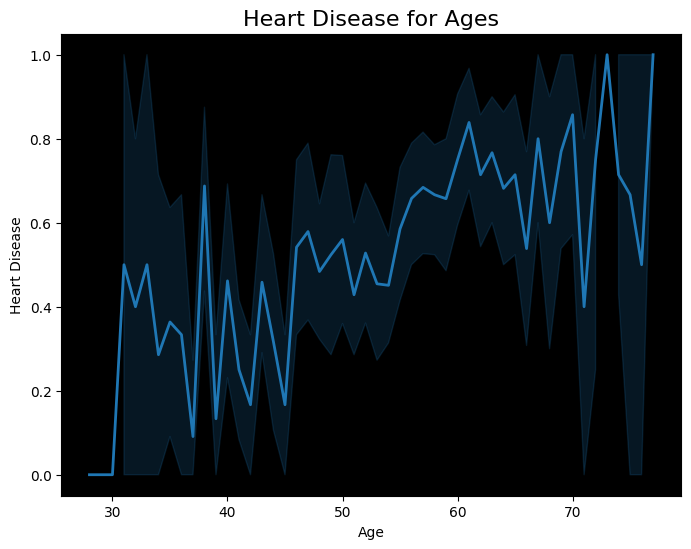

In [27]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Age'], y=df['HeartDisease'], data=df, linewidth=2)


plt.title('Heart Disease for Ages', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Heart Disease')

plt.gca().set_facecolor('black')

# Show the plot
plt.show()

##**⭐Checking Distribution of HeartDisease by Age**

In [30]:
fig = px.scatter(df, y = 'Age',x='Cholesterol', color='Cholesterol' )


fig.update_layout(title='Cholesterol by Age',
                  title_font_size=16,
                  width=800,
                  height=600,
                  title_x=0.5, plot_bgcolor='black')

fig.show()

## **⭐ 'RestingECG','ST_Slope','ChestPainType','ExerciseAngina' by Heart Disease**

In [33]:
from plotly.subplots import make_subplots

list=['RestingECG','ST_Slope','ChestPainType','ExerciseAngina']

fig = make_subplots(rows=2, cols=2, subplot_titles=list)

for i, col in enumerate(list, 1):



    Col_fordisease  = df.groupby([col, 'Sex']).size().reset_index(name='count')

    custom_palette = {"M": '#7799cc', "F": "pink"}

    for gender, color in custom_palette.items():
        gender_data = Col_fordisease[Col_fordisease['Sex'] == gender]
        fig.add_trace(go.Bar(x=gender_data[col], y=gender_data['count'],
                         text=gender_data['count'],
                         name=gender, marker_color=color),
                      row=(i+1)//2, col=(i+1)%2+1)

    fig.update_xaxes(title_text=col, row=(i+1)//2, col=(i+1)%2+1)
    fig.update_yaxes(title_text='Count', row=(i+1)//2, col=(i+1)%2+1)

fig.update_layout(title_text="Charts by Heart Disease", title_font_size=16, title_x=0.5, plot_bgcolor='black',
                  height=900)

fig.show()

## **⭐'RestingECG','ST_Slope','ChestPainType','ExerciseAngina' by Heart Disease**

In [34]:
list=['RestingECG','ST_Slope','ChestPainType','ExerciseAngina']

fig = make_subplots(rows=2, cols=2, subplot_titles=list)

for i, col in enumerate(list, 1):



    Col_fordisease  = df.groupby([col, 'HeartDisease']).size().reset_index(name='count')

    custom_palette = {0: '#2ca02c', 1: '#ff7f0e'}

    for gender, color in custom_palette.items():
        gender_data = Col_fordisease[Col_fordisease['HeartDisease'] == gender]
        fig.add_trace(go.Bar(x=gender_data[col], y=gender_data['count'],
                         text=gender_data['count'],
                         name=gender, marker_color=color),
                      row=(i+1)//2, col=(i+1)%2+1)

    fig.update_xaxes(title_text=col, row=(i+1)//2, col=(i+1)%2+1)
    fig.update_yaxes(title_text='Count', row=(i+1)//2, col=(i+1)%2+1)

fig.update_layout(title_text="Charts by Heart Disease", title_font_size=16, title_x=0.5, plot_bgcolor='black',
                  height=900)

fig.show()

# **🌟 Preprocessing**

## **⭐ Feature Selection**

In [35]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


## **⭐ Covert Catogrical Data To Numerical**

In [36]:
X=pd.get_dummies(X, drop_first=True)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


## **⭐ Scalling the Data**

In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X)

X_scaled= scaler.transform(X)
print("Normalized input data(X):\n", X_scaled)

Normalized input data(X):
 [[-1.4331398   0.41090889  0.82507026 ... -0.8235563  -1.00218103
   1.15067399]
 [-0.47848359  1.49175234 -0.17196105 ... -0.8235563   0.99782372
  -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  ... -0.8235563  -1.00218103
   1.15067399]
 ...
 [ 0.37009972 -0.12951283 -0.62016778 ...  1.21424608  0.99782372
  -0.86905588]
 [ 0.37009972 -0.12951283  0.34027522 ... -0.8235563   0.99782372
  -0.86905588]
 [-1.64528563  0.30282455 -0.21769643 ... -0.8235563  -1.00218103
   1.15067399]]


## **⭐ Spliting the Data**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **🌟 Model Selection**

In [39]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


xgb = XGBClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300, 800,850],
    'learning_rate': [0.01, 0.001, 0.1, 0.2],
    'max_depth': [3, 4, 5,6],
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

## **⭐ Fitting the model**

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 800, 850]},
             scoring='roc_auc')

## **⭐ Best hyper parameters ,best_estimator by XGBoost**

In [41]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 850}


In [42]:
best_model = grid_search.best_estimator_
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


## **⭐ Prediction**

In [43]:
y_pred=best_model.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1]


In [44]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten() })
result_df

,Actual,Predicted
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
211,1,0
745,1,1
584,1,1
878,0,0


# **🌟 Evaluation of Model**

## **⭐ confusion_matrix**

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for XGBoostClassifier:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for XGBoostClassifier:
[[66 11]
 [11 96]]
____________________________________________________________________________________________________
num of True Positive : 96
num of True Negative : 66
num of False Positive : 11
num of False Negative : 11


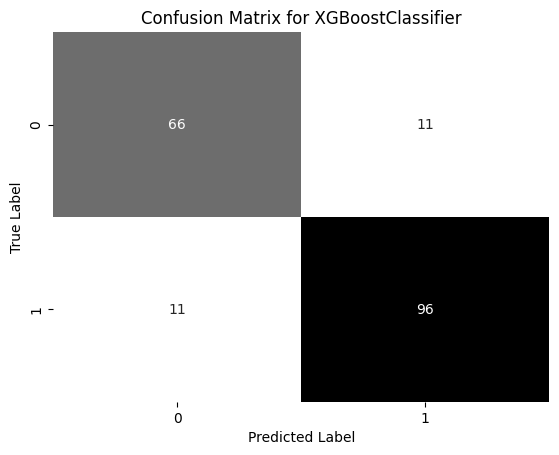

In [46]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **⭐ Classification Report**

In [47]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



## **⭐ Evaluation**

In [48]:
from sklearn.metrics import precision_score, recall_score ,accuracy_score


# Calculate precision and recall
precision = precision_score(y_test, y_pred)
print(f'Precision of XGBoostClassifier : {precision*100:.2f} %')

recall = recall_score(y_test, y_pred)
print(f'Recall of XGBoostClassifier    : {recall*100:.2f} %')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of XGBoostClassifier  : {accuracy*100:.2f} %')

Precision of XGBoostClassifier : 89.72 %
Recall of XGBoostClassifier    : 89.72 %
Accuracy of XGBoostClassifier  : 88.04 %
